In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
os.chdir('/home/sidrah19220/nmd/loomfiles/updates/point1')

In [3]:
#read expression matrix
wild_exp = pd.read_csv('wild_exp_zscore.csv', index_col =0)

In [4]:
exp_or = wild_exp.filter(like = 'Olfr', axis =1)

MATURE CELLS

In [5]:
mature_exp = exp_or[:2250]

In [7]:
#maximum expression OR
mat_values = mature_exp.max(axis=1).values.tolist()
mat_or = mature_exp.idxmax(axis=1).values.tolist()

In [8]:
l = [mat_values, mat_or]
df1 = pd.DataFrame(l).T
df1.index = mature_exp.index.tolist()
df1.columns = ['EXP VALUE', 'OR']

In [11]:
#take only those that have expression higher than 0
expressed_mature = df1[df1['EXP VALUE']!=0]
or_exp_list = expressed_mature.value_counts(['OR'])

In [16]:
df2 = or_exp_list.to_frame()
df2.reset_index(inplace=True)  

In [119]:
df2.columns = ['OR', 'MATURE']

In [120]:
df2.to_csv('mature_or_count.csv')

In [123]:
ors = df2['OR'].values.tolist()
freq1 = df2['MATURE'].values.tolist()

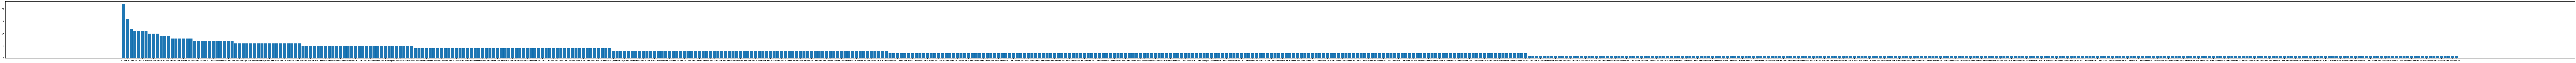

In [124]:
fig = plt.figure()
ax = fig.add_axes([0,0,30,1])
ax.bar(ors,freq1)
plt.savefig('OR-mature-distribution1.pdf')

TRANS

In [126]:
immature_exp = exp_or[2250:2558]
#maximum expression OR
immat_values = immature_exp.max(axis=1).values.tolist()
immat_or = immature_exp.idxmax(axis=1).values.tolist()
l = [immat_values, immat_or]
df1 = pd.DataFrame(l).T
df1.index = immature_exp.index.tolist()
df1.columns = ['EXP VALUE', 'OR']
#take only those that have expression higher than 0
expressed_immature = df1[df1['EXP VALUE']!=0]
or_exp_list = expressed_immature.value_counts(['OR'])
df2 = or_exp_list.to_frame()
df2.reset_index(inplace=True)  
df2.columns = ['OR', 'TRANS']
ors = df2['OR'].values.tolist()
freq1 = df2['TRANS'].values.tolist()

In [127]:
df2.to_csv('trans_or_count.csv')

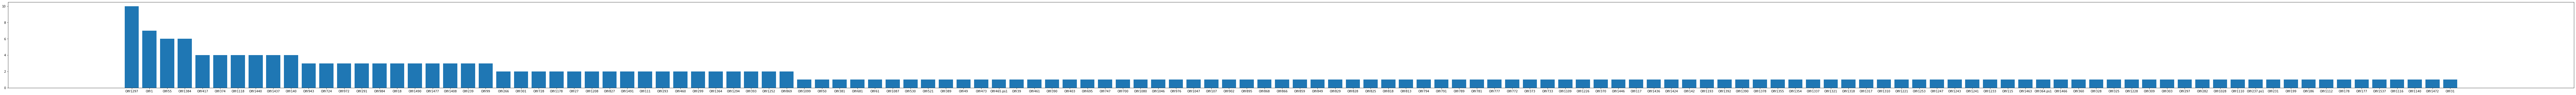

In [128]:
fig = plt.figure()
ax = fig.add_axes([0,0,20,1])
ax.bar(ors,freq1)
plt.savefig('OR-trans-distribution1.pdf')

IMMATURE

In [129]:
immature_exp = exp_or[2558:]
#maximum expression OR
immat_values = immature_exp.max(axis=1).values.tolist()
immat_or = immature_exp.idxmax(axis=1).values.tolist()
l = [immat_values, immat_or]
df1 = pd.DataFrame(l).T
df1.index = immature_exp.index.tolist()
df1.columns = ['EXP VALUE', 'OR']
#take only those that have expression higher than 0
expressed_immature = df1[df1['EXP VALUE']!=0]
or_exp_list = expressed_immature.value_counts(['OR'])
df2 = or_exp_list.to_frame()
df2.reset_index(inplace=True)  
df2.columns = ['OR', 'IMMATURE']
ors = df2['OR'].values.tolist()
freq1 = df2['IMMATURE'].values.tolist()

In [130]:
df2.to_csv('immature_or_count.csv')

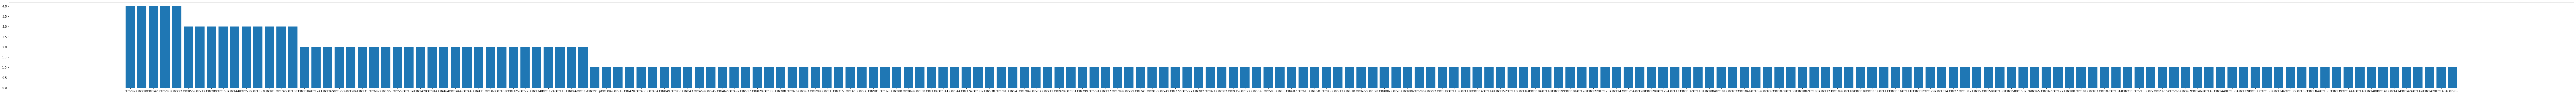

In [131]:
fig = plt.figure()
ax = fig.add_axes([0,0,20,1])
ax.bar(ors,freq1)
plt.savefig('OR-immature-distribution1.pdf')

HEATMAP

In [147]:
#input for heatmap
a = pd.read_csv('mature_or_count.csv', index_col =1)
b = pd.read_csv('trans_or_count.csv', index_col =1)
c = pd.read_csv('immature_or_count.csv', index_col =1)

In [154]:
a = a.drop(['Unnamed: 0'], axis =1)
b = b.drop(['Unnamed: 0'], axis =1)
c = c.drop(['Unnamed: 0'], axis =1)

In [159]:
#concatenated data
lis = [a, b, c]
fin = pd.concat(lis, axis =1)

In [160]:
finn = fin.fillna(0)
finn.to_csv('point1.csv')